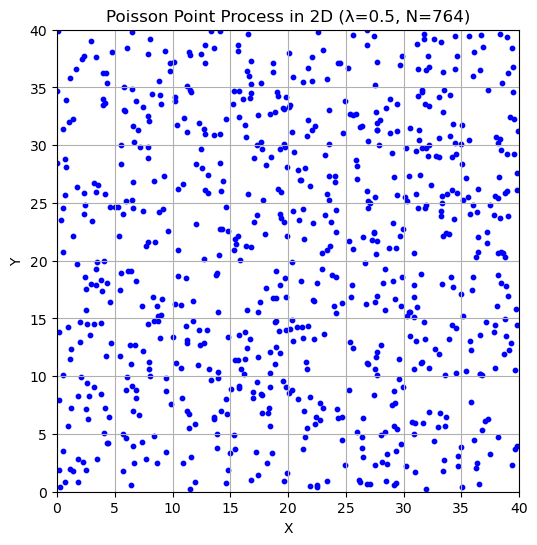

In [2]:
import importlib
import poisson_independent_points
importlib.reload(poisson_independent_points)
from poisson_independent_points import PoissonPointProcess2D

width = 40
generator = PoissonPointProcess2D(0.5, (width, width))
generator.generate_points()
generator.plot_points()
point_positions = generator.get_points()

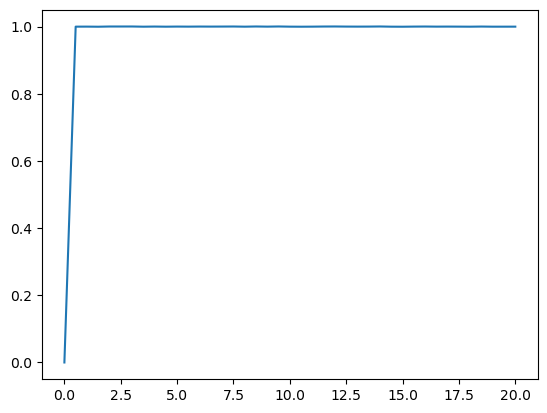

In [3]:
import calc
importlib.reload(calc)
import matplotlib.pyplot as plt
from calc import Hyperuniform_helper
import numpy as np

all_gr = []
for _ in range(1000000):
    generator = PoissonPointProcess2D(0.5, (width, width))
    generator.generate_points()
    point_positions = generator.get_points()
    helper = Hyperuniform_helper(width/2, (width/2, width/2), point_positions, generator.intensity)
    r, gr = helper.calculate_radial_distribution(40, 2)
    all_gr.append(gr)

avg_gr = np.mean(all_gr, axis=0)
plt.plot(r, avg_gr)

[0.0000e+00 2.0000e-03 4.0000e-03 ... 1.9996e+01 1.9998e+01 2.0000e+01] [1.0025685  1.0025728  1.0025857  ... 1.00059782 1.00062132 1.00064457]


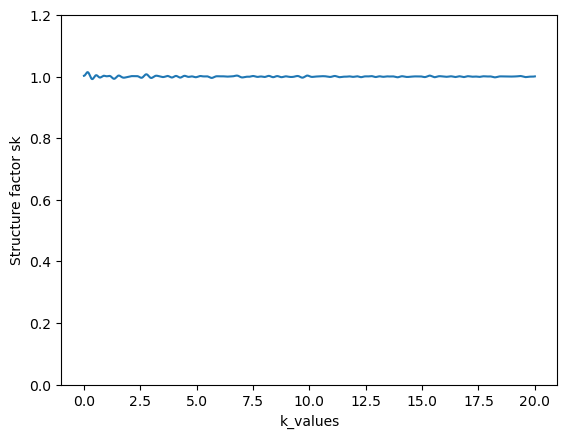

In [11]:
k_values = np.linspace(0, 20, 10001)
sk = helper.hankel_transform_2d(avg_gr[1:], r[1:], k_values)
plt.plot(k_values, sk)
plt.xlabel("k_values")
plt.ylabel("Structure factor sk")
plt.ylim((0,1.2))
print(k_values, sk)

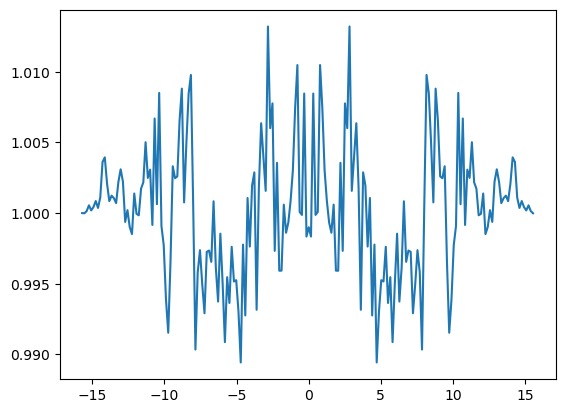

In [24]:
helper = Hyperuniform_helper(width/2, (width/2, width/2), point_positions, generator.intensity)
sk = helper.Fourier_transform_2d(avg_gr[1:])
r_neg = -r[1:][::-1]         # Negative radial coordinates
r_full = np.concatenate((r_neg, r[1:]))
N = len(r_full)
k_values = 2 * np.pi * np.fft.fftshift(np.fft.fftfreq(N, d=(r[1] - r[0])))
plt.plot(k_values, sk)
